In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats

In [55]:
# load data
sales = pd.read_csv("../../ML Data & Script/kc_house_data.csv")
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [56]:
# split data into training and testing
from sklearn.model_selection import train_test_split
target = sales['price']
X_train, X_test, y_train, y_test = train_test_split(sales, target, test_size=0.2, random_state=0)

In [57]:
# calculate average house price
sum_prices = target.sum()
num_houses = target.shape[0]
avg_price_1 = sum_prices/num_houses
avg_price_2 = target.mean() 
print("average price via method 1: " + str(avg_price_1))
print("average price via method 2: " + str(avg_price_2))

average price via method 1: 540088.1417665294
average price via method 2: 540088.1417665294


In [58]:
# all rows of the series are multiplied by 0.5
half_prices = 0.5 * prices
prices_squared = prices * prices
sum_prices_squared = prices_squared.sum()
print("the sum of price squared is: " + str(sum_prices_squared))

the sum of price squared is: 9217325138472070.0


In [59]:
# find the slope and intercept of the fitted line using closed form solution
# gradient = 0
def simple_linear_regression(input_feature, output):
    # compute the sum of input_feature and output
    v1 = input_feature.sum()
    v2 = output.sum()
    # compute the product of the output and the input_feature and its sum
    v3 = (input_feature * output).sum()    
    # compute the squared value of the input_feature and its sum
    v4 = (input_feature * input_feature).sum()
    # use the formula for the slope
   # print v1,v2,v3,v4
    n = input_feature.shape[0]
    slope = (v3 - (v2 * v1) / n) / (v4 - (v1 * v1) / n)
    # use the formula for the intercept
    intercept = (v2 / n) - (slope * v1) / n
    return (intercept, slope)

In [61]:
# generate data using a known linear expression
test_feature = pd.Series(range(5))
test_output = pd.Series(1.5 + 3 * test_feature)
(test_intercept, test_slope) =  simple_linear_regression(test_feature, test_output)
# the closed form solution should return 1.5 and 3.0
print("Intercept: " + str(test_intercept))
print("Slope: " + str(test_slope))

Intercept: 1.5
Slope: 3.0


In [62]:
sqft_intercept, sqft_slope = simple_linear_regression(X_train['sqft_living'], y_train)

print("Intercept: " + str(sqft_intercept))
print("Slope: " + str(sqft_slope))

Intercept: -48257.063591028564
Slope: 283.96855715512993


In [63]:
def get_regression_predictions(input_feature, intercept, slope):
    # calculate the predicted values:
    predicted_values = intercept + slope * input_feature
    return predicted_values

In [64]:
print("estimated price ",get_regression_predictions(2650,sqft_intercept, sqft_slope))

estimated price  704259.6128700657


In [65]:
def get_residual_sum_of_squares(input_feature, output, intercept, slope):
    # First get the predictions
    predictions = get_regression_predictions(input_feature,intercept, slope)
    # then compute the residuals (since we are squaring it doesn't matter which order you subtract)
    residuals = predictions - output
    # square the residuals and add them up
    RSS = (residuals * residuals).sum()
    return(RSS)

In [66]:
# should be 0.0
test_feature = pd.Series(range(5))
test_output = pd.Series(1 + 3*test_feature)
print(get_residual_sum_of_squares(test_feature, test_output, test_intercept, test_slope)) 

1.25


In [67]:
def inverse_regression_predictions(output, intercept, slope):
    # solve output = intercept + slope*input_feature for input_feature. Use this equation to compute the inverse predictions:
    estimated_feature = (output-intercept)/slope
    return estimated_feature

In [68]:
print(inverse_regression_predictions(800000,sqft_intercept,sqft_slope))

2987.1513666480755


In [69]:
# Estimate the slope and intercept for predicting 'price' based on 'bedrooms'
(bed_intercept, bed_slope) = simple_linear_regression(X_train['bedrooms'], y_train)
(bed_intercept, bed_slope)

(126751.84729183262, 123535.45861796693)

In [70]:
# Compute RSS when using square feet on TEST data:
RSS1 = get_residual_sum_of_squares(X_test['sqft_living'], y_test, sqft_intercept, sqft_slope)
# Compute RSS when using bedrooms on TEST data:
RSS2 = get_residual_sum_of_squares(X_test['bedrooms'], y_test, sqft_intercept, sqft_slope)
print("RSS using square feet: %.2f"%(RSS1))
print("RSS using bedrooms: %.2f"%(RSS2))

RSS using square feet: 267770022739752.81
RSS using bedrooms: 1950849595197225.75


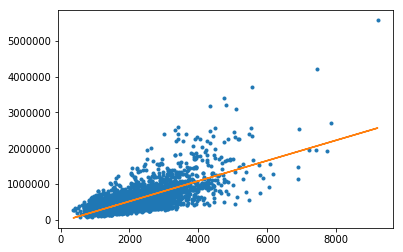

In [71]:
# prediction
y_pred = get_regression_predictions(X_test['sqft_living'], sqft_intercept, sqft_slope)
# scatter plot and prediction line
plt.plot(X_test['sqft_living'],y_test,'.', X_test['sqft_living'], y_pred,'-')